<a href="https://colab.research.google.com/github/seungukkim/R_lecture/blob/main/day0705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 랜덤 포레스트
- Decision TRee(나무 1개)
  + 여러 개 심음
  + 샘플링
  + Feature Importance
- 예측해야 할 행의 갯수, 100만개
- 컬럼의 갯수 200개 -> 100개
  + 나무 100개를 심고 평균을 내자
  + 나무 1개 당 컬럼을 10개로
  + T1 ame : 20 / T2 mae : 30 / T3 mae 10,...
    + T1 ~ T100 ame : 200개
    + featrue importances
  + 샘플링 : 부트스트랩 샘플 (복원 추출)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련 데이터
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state=42
)
# 모델링
rf = RandomForestClassifier(n_jobs =-1, random_state=42)

#모형 평가
scores = cross_validate(rf, train_input, train_target, return_train_score= True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

#특성 중요
rf.fit(train_input, train_target)
print(rf.feature_importances_)

#OOB
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf. fit(train_input, train_target)
print(rf.oob_score_)

0.9973541965122431 0.8905151032797809
[0.23167441 0.50039841 0.26792718]
0.8934000384837406


## 그레이디언트 부스팅
- 경사하강법의 원리를 이용함
- T1 ~TN 증가하면서 오차를 보정해주며 정확성을 높임
- 랜덤포레스트와의 차이점
  + 랜덤포레스트는 각 나무간 상호 연관성 x
  + 부스팅은 각 나무간 상호 연관성 O
- 단점
  + 속도가 너무 느림
- 대안
  + XGBoost, LightGBM

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 500,learning_rate =0.2,random_state =42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))



0.9464595437171814 0.8780082549788999


- 특성 중요도 

In [22]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


## 주성분 분석
- 이론적으로는 어려움
- 좌표계 공간 개념
- 직교 + 회전
- 공분산 등(통계 관련 내용)
- Feature Engineering 기법
- StandardScaler()
- 컬럼의 개수가 너무 많다.
- 차원 축소
  + 특성이 많으면 훈련 데이터에 쉽게 과대적합된다.
  + 특성을 줄여서 학습 모델의 성능을 향상시킨다. 
  + 대표적인 방법론 중 하나가 PCA, EFA

- PCA vs EFA
  + EFA(탐색적 요인 분석), Factor Analsis
  + 예) 국어 ,수학, 과학, 영어
  + 예 ) 국어 40, 수학 100, 과학 100, 영어 30 / 귀 학생은 언어 영역은 수준이 낮은편이나 수리영역은 매우 수준이 높습니다.
  + 예? 번주형 & 수치 데이터셋
  + PCA(주성분 분석)
    - 장비1, 장비2, 장비 3, ...
    - pc1, pc2 ,pc3 ...
    - 원래 가지고 있던 정보를 알 수 없음(정보 손실)
    - 범주형 데이터셋에는 사용 안됨
    - 무조건 수치형 데이터에서만 사용
실행 )
- p.320


In [23]:
# 데이터 내려받기 -O(대문자 O이다)
!wget https://bit.ly/fruits_300_data -O fruits_300.npy


--2022-07-05 07:50:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-05 07:50:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-05 07:50:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [24]:
import numpy as np
fruits = np.load('/content/fruits_300.npy')
print(fruits.shape)
fruits_2d = fruits.reshape(-1,100*100) # 300개의 행, 10000개의 열
fruits_2d.shape

(300, 100, 100)


(300, 10000)

- PCA


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components =50) #PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분 개수를 지정한다.
pca.fit(fruits_2d)


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- n_components를 50으로 지정해서 pca.components_ 배열의 첫번째 차원이 50으로 나타난다. 즉 50개의 주성분을 찾은 것이다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10000이다.

In [26]:
print(pca.components_.shape)

(50, 10000)


In [27]:

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

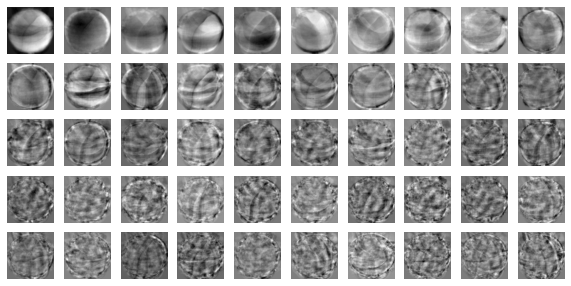

In [28]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [29]:
# 머신러닝에서 컬럼의 개수를 10000개에서 50개로 줄임
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 훈련데이터, 테스트 데이터 분리 

## 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [30]:
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다.
# PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

print(np.sum(pca.explained_variance_ratio_))

0.9215214358477614


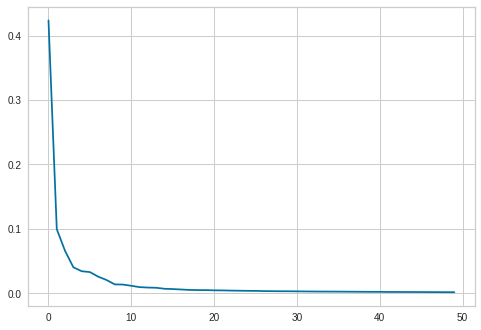

In [31]:

plt.plot(pca.explained_variance_ratio_)
plt.show()
# 그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터의 각 주성분이 설명하는 분산은 비교적으로 작다.

In [42]:
print(np.sum(pca.explained_variance_ratio_[:50]))

0.9215214358477614


In [22]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user
!pip install pycaret
!pip install markupsafe==2.0.1

Found existing installation: sklearn 0.0
Uninstalling sklearn-0.0:
  Successfully uninstalled sklearn-0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5566fc096d6ec95daf803ef331a5510fa75a651d8e4d1d9f06b99dfd8c4e2161
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 27.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-le

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 19.6 MB/s 
     |████████████████████████████████| 17.9 MB 54.3 MB/s 
     |████████████████████████████████| 262 kB 42.6 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 44.5 MB/s 
     |████████████████████████████████| 122 kB 68.6 MB/s 
     |████████████████████████████████| 10.4 MB 41.6 MB/s 
     |████████████████████████████████| 167 kB 57.6 MB/s 
     |████████████████████████████████| 1.3 MB 53.8 MB/s 
     |████████████████████████████████| 1.7 MB 50.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 1.3 MB 63.9 MB/s 
     |████████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
dataset.info() #credit에 대한 information을 가져오는 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

In [4]:
#credit 에 대한 데이터를 가공하는 과정
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


- set up

In [5]:
# 설정을 해주는 단계
import jinja2
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


## 모델링 

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.050
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.300
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,5.809
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,1.306
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.408
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,3.321
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,2.400
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.985
dummy,Dummy Classifier,0.7814,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.031
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.986


- 가장 좋은 모델을 뽑아주세요 

In [7]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


- 모델 생성 

In [8]:
# knn 모델에 대해서
knn_model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500


In [10]:
import numpy as np
params ={
    'n_neighbors': np.arange(0,50,1)
}
tunned_knn = tune_model(knn_model, custom_grid =params)
print(tunned_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7813,0.6482,0.0372,0.5000,0.0693,0.0402,0.0876
1,0.7807,0.6436,0.0315,0.4783,0.0591,0.0330,0.0759
2,0.7744,0.6563,0.0315,0.3333,0.0576,0.0206,0.0403
3,0.7845,0.6589,0.0659,0.5610,0.1179,0.0754,0.1345
4,0.7826,0.6645,0.0315,0.5500,0.0596,0.0368,0.0903
5,0.7794,0.6477,0.0544,0.4634,0.0974,0.0539,0.0961
6,0.7826,0.6278,0.0630,0.5238,0.1125,0.0688,0.1214
7,0.7751,0.6702,0.0372,0.3611,0.0675,0.0278,0.0523
8,0.7813,0.6409,0.0630,0.5000,0.1120,0.0662,0.1146


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


- auc
- 최소 0.5
- 좋은 모델 0.8
- 최고 1

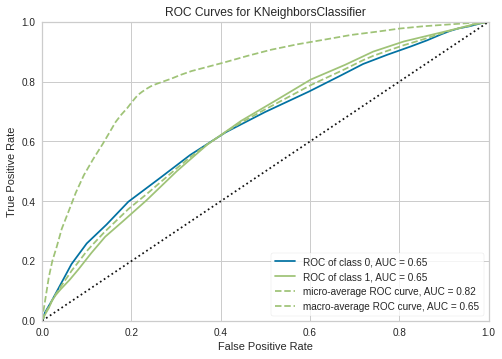

In [11]:
plot_model(tunned_knn,plot='auc')

In [12]:
# 의사결정틜
evaluate_model(tunned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…